In [2]:
from rdkit import Chem

In [3]:
m = Chem.MolFromSmiles('Cc1ccccc1')

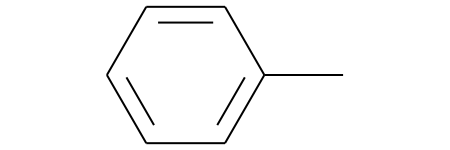

In [4]:
m

In [5]:
m.GetAtoms

<bound method GetAtoms of <rdkit.Chem.rdchem.Mol object at 0x000001DE21D17D00>>

In [6]:
m is None

False

In [7]:
m.GetNumAtoms()

7

In [8]:
m = Chem.MolFromSmiles('C1OC1')
for atom in m.GetAtoms():
    print(atom.GetPropNames())

<rdkit.rdBase._vectclass std::basic_string<char,struct std::char_traits<char>,class std::allocator<char> > object at 0x000001DE21D3D350>
<rdkit.rdBase._vectclass std::basic_string<char,struct std::char_traits<char>,class std::allocator<char> > object at 0x000001DE21D3D350>
<rdkit.rdBase._vectclass std::basic_string<char,struct std::char_traits<char>,class std::allocator<char> > object at 0x000001DE21D3D350>


In [9]:
cs = Chem.CanonSmiles("CCOC(=O)C(CC1=CC(=C(C=C1)O)O)N")

In [10]:
cs

'CCOC(=O)C(N)Cc1ccc(O)c(O)c1'

In [11]:
mol = Chem.MolFromSmiles("CCOC(=O)C(CC1=CC(=C(C=C1)O)O)N")

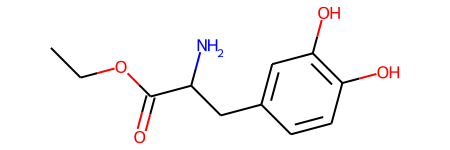

In [12]:
mol

In [24]:
import pandas as pd
from rdkit.Chem.Fingerprints import FingerprintMols
from rdkit import DataStructs
df = pd.read_table("compounds.csv", sep=";")

In [25]:
df['smiles']

0           CCOC(=O)C(CC1=CC(=C(C=C1)O)O)N
1         COC(=O)C(CC1=CC(=C(C=C1)O)O)N.Cl
2           CCOC(=O)C(CC1=CC(=C(C=C1)O)O)N
3    C1=CC(=C(C=C1CC(C(=O)O)N)O)OP(=O)(O)O
4            COC(=O)C(CC1=CC(=C(C=C1)O)O)N
5        C1=CC(=C(C=C1CC(C(=O)O)N)O)O.[Na]
6            COC1=C(C=C(C=C1)CC(C(=O)O)N)O
7            COC1=C(C=CC(=C1)CC(C(=O)O)N)O
Name: smiles, dtype: object

In [26]:
i = 0
df['calc'] = None
for smiles in df['smiles']:
  new = Chem.CanonSmiles(smiles)
  levod = Chem.MolFromSmiles(Chem.CanonSmiles(smiles))
  print(levod)
  fps = FingerprintMols.FingerprintMol(levod)
  print(fps)
  rs = FingerprintMols.FingerprintMol(Chem.MolFromSmiles(Chem.CanonSmiles(smiles)))
  cs = FingerprintMols.FingerprintMol(Chem.MolFromSmiles(Chem.CanonSmiles('C1=CC(=C(C=C1CC(C(=O)O)N)O)O')))
  print(DataStructs.FingerprintSimilarity(rs,cs))
  if df['calc'][i] is None:
    df['calc'][i] = DataStructs.FingerprintSimilarity(rs,cs)
    i = i + 1
  print('_____________________________________________________________________________')
  

0.872791519434629
_____________________________________________________________________________
0.9182156133828996
_____________________________________________________________________________
0.872791519434629
_____________________________________________________________________________
0.7891373801916933
_____________________________________________________________________________
0.9182156133828996
_____________________________________________________________________________
1.0
_____________________________________________________________________________
0.8916967509025271
_____________________________________________________________________________
0.8821428571428571
_____________________________________________________________________________


In [365]:
df

,name,smiles,pubmed,calc
0,"Ethyl 2-amino-3-(3,4-dihydroxyphenyl)propanoate",CCOC(=O)C(CC1=CC(=C(C=C1)O)O)N,https://pubchem.ncbi.nlm.nih.gov/compound/1179...,0.872792
1,"(S)-Methyl 2-amino-3-(3,4-dihydroxyphenyl)prop...",COC(=O)C(CC1=CC(=C(C=C1)O)O)N.Cl,https://pubchem.ncbi.nlm.nih.gov/compound/1013...,0.918216
2,Etilevodopa,CCOC(=O)C(CC1=CC(=C(C=C1)O)O)N,https://pubchem.ncbi.nlm.nih.gov/compound/170345,0.872792
3,Foslevodopa,C1=CC(=C(C=C1CC(C(=O)O)N)O)OP(=O)(O)O,https://pubchem.ncbi.nlm.nih.gov/compound/127766,0.789137
4,Melevodopa,COC(=O)C(CC1=CC(=C(C=C1)O)O)N,https://pubchem.ncbi.nlm.nih.gov/compound/23497,0.918216
5,L-DOPA (sodium),C1=CC(=C(C=C1CC(C(=O)O)N)O)O.[Na],https://pubchem.ncbi.nlm.nih.gov/compound/1386...,1.0
6,"Tyrosine, 3-hydroxy-O-methyl-",COC1=C(C=C(C=C1)CC(C(=O)O)N)O,https://pubchem.ncbi.nlm.nih.gov/compound/1340...,0.891697
7,3-Methoxytyrosine,COC1=C(C=CC(=C1)CC(C(=O)O)N)O,https://pubchem.ncbi.nlm.nih.gov/compound/1670...,0.882143


In [376]:
clcpom = df

In [377]:
clcpom

,name,smiles,pubmed,calc
0,"Ethyl 2-amino-3-(3,4-dihydroxyphenyl)propanoate",CCOC(=O)C(CC1=CC(=C(C=C1)O)O)N,https://pubchem.ncbi.nlm.nih.gov/compound/1179...,0.872792
1,"(S)-Methyl 2-amino-3-(3,4-dihydroxyphenyl)prop...",COC(=O)C(CC1=CC(=C(C=C1)O)O)N.Cl,https://pubchem.ncbi.nlm.nih.gov/compound/1013...,0.918216
2,Etilevodopa,CCOC(=O)C(CC1=CC(=C(C=C1)O)O)N,https://pubchem.ncbi.nlm.nih.gov/compound/170345,0.872792
3,Foslevodopa,C1=CC(=C(C=C1CC(C(=O)O)N)O)OP(=O)(O)O,https://pubchem.ncbi.nlm.nih.gov/compound/127766,0.789137
4,Melevodopa,COC(=O)C(CC1=CC(=C(C=C1)O)O)N,https://pubchem.ncbi.nlm.nih.gov/compound/23497,0.918216
5,L-DOPA (sodium),C1=CC(=C(C=C1CC(C(=O)O)N)O)O.[Na],https://pubchem.ncbi.nlm.nih.gov/compound/1386...,1.0
6,"Tyrosine, 3-hydroxy-O-methyl-",COC1=C(C=C(C=C1)CC(C(=O)O)N)O,https://pubchem.ncbi.nlm.nih.gov/compound/1340...,0.891697
7,3-Methoxytyrosine,COC1=C(C=CC(=C1)CC(C(=O)O)N)O,https://pubchem.ncbi.nlm.nih.gov/compound/1670...,0.882143


In [381]:
larg=[]
for i in range(0,3):
    largest = clcpom['calc'][0]
    for num2 in clcpom['calc']:
        if num2 > largest:
            largest=num2
    larg.append(clcpom[clcpom.calc == largest])
    clcpom = clcpom[clcpom.calc != largest]



In [382]:
larg

[              name                             smiles  \
 5  L-DOPA (sodium)  C1=CC(=C(C=C1CC(C(=O)O)N)O)O.[Na]   
 
                                               pubmed calc  
 5  https://pubchem.ncbi.nlm.nih.gov/compound/1386...  1.0  ,
                                                 name  \
 1  (S)-Methyl 2-amino-3-(3,4-dihydroxyphenyl)prop...   
 4                                         Melevodopa   
 
                              smiles  \
 1  COC(=O)C(CC1=CC(=C(C=C1)O)O)N.Cl   
 4     COC(=O)C(CC1=CC(=C(C=C1)O)O)N   
 
                                               pubmed      calc  
 1  https://pubchem.ncbi.nlm.nih.gov/compound/1013...  0.918216  
 4    https://pubchem.ncbi.nlm.nih.gov/compound/23497  0.918216  ,
                             name                         smiles  \
 6  Tyrosine, 3-hydroxy-O-methyl-  COC1=C(C=C(C=C1)CC(C(=O)O)N)O   
 
                                               pubmed      calc  
 6  https://pubchem.ncbi.nlm.nih.gov/compound/1340...  0.8916